In [1]:
import numpy as np
import pandas as pd

In [5]:
dff = pd.read_csv('movies.csv')

In [13]:
selected_columns= ['title','budget_musd','revenue_musd','production_companies','runtime','cast_size']
df_selected = dff[selected_columns]

In [14]:
df_selected = df_selected.dropna()

In [15]:
print(df_selected[['title','budget_musd','runtime']].head(20))

                             title  budget_musd  runtime
0                        Toy Story        30.00     81.0
1                          Jumanji        65.00    104.0
3                Waiting to Exhale        16.00    127.0
5                             Heat        60.00    170.0
8                     Sudden Death        35.00    106.0
9                        GoldenEye        58.00    130.0
10          The American President        62.00    106.0
13                           Nixon        44.00    192.0
14                Cutthroat Island        98.00    119.0
15                          Casino        52.00    178.0
16           Sense and Sensibility        16.50    136.0
17                      Four Rooms         4.00     98.0
18  Ace Ventura: When Nature Calls        30.00     90.0
19                     Money Train        60.00    103.0
20                      Get Shorty        30.25    105.0
22                       Assassins        50.00    132.0
24               Leaving Las Ve

Q2.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('movies.csv')

In [27]:
avg_vote = df['vote_average'].median()
df['vote_average'].fillna(avg_vote,inplace=True)


In [28]:

q1 = df['vote_average'].quantile(0.25)
q3 = df['vote_average'].quantile(0.75)
iqr = q3-q1


In [29]:
print(f"Median of average vote = {avg_vote}")
print(f"Q1 of average vote = {q1}")
print(f"Q3 of average vote = {q3}")
print(f"Q3 of average vote = {iqr}")

Median of average vote = 6.1
Q1 of average vote = 5.3
Q3 of average vote = 6.8
Q3 of average vote = 1.5


In [30]:
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

In [31]:
outliers = df[(df['vote_average']<lower_bound) | (df['vote_average']>upper_bound)]['vote_average']

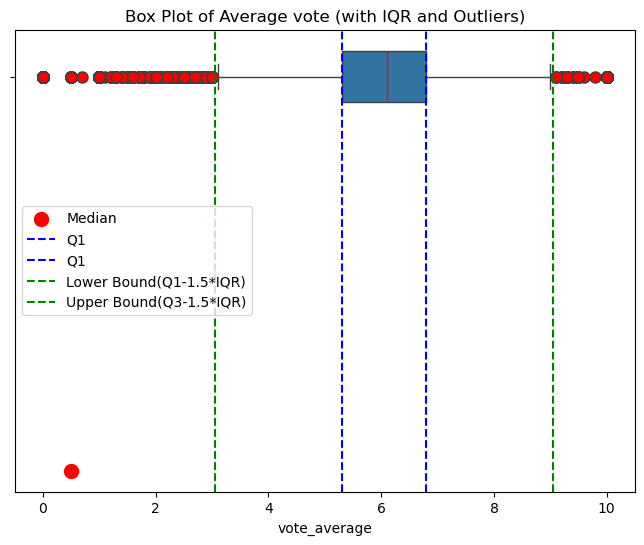

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(x='vote_average',data=df,showfliers = True,medianprops = dict(color='red'),flierprops=dict(marker='o',markerfacecolor='red',markersize=8))
plt.scatter(x=[0.5],y=[avg_vote],color='red',s=100,label='Median')
plt.axvline(x=q1,linestyle='--',label='Q1',color='blue')
plt.axvline(x=q3,linestyle='--',label='Q1',color='blue')
plt.axvline(x=lower_bound,ls='--',color='green',label='Lower Bound(Q1-1.5*IQR)')
plt.axvline(x=upper_bound,ls='--',color='green',label='Upper Bound(Q3-1.5*IQR)')
plt.legend()
plt.title("Box Plot of Average vote (with IQR and Outliers)")
plt.show()
